# Tutorial 5: Supervised Learning Applications

## Objectives

After this tutorial you will be able to:

- Grasp the fundamentals of supervised learning algorithms and their applications in chemical engineering problems.
- Learn techniques for data cleaning, pre-processing, and feature engineering relevant to chemical processes.
- Gain hands-on experience building supervised learning models in Python using scikit-learn library.
- Explore metrics for assessing model accuracy, precision, and generalizability for chemical engineering tasks.

<h2>Table of Contents</h2>

<ol>
    <li>
        <a href="#1">Linear Regression</a>
    </li>
    <br>
    <li>
        <a href="#2">Logistic Regression</a>
    </li>
    <br>
    <li>
        <a href="#3">K-Nearest Neighbor (KNN)</a>
    </li>
    <br>
</ol>


<hr id="1">
<h2>1. Linear Regression</h2>


### **Overview**
- Linear regression is a supervised learning algorithm used for regression tasks.
- It models the relationship between a dependent variable (target) and one or more independent variables (features) using a linear equation.
- The goal is to find the best-fitting linear line that minimizes the difference between actual and predicted values.
- It assumes a linear relationship between features and the target variable.
- Commonly used techniques for fitting linear regression models include Ordinary Least Squares (OLS) and Gradient Descent.


<div style="text-align: center; margin:2rem;">
    <img src="linear-regression.webp">
    <br>
    <small>*source: https://medium.com/@thaddeussegura/multiple-linear-regression-in-200-words-data-8bdbcef34436</small>
</div>


<hr width="50%" style="margin-top: 2rem; margin-bottom: 2rem; margin-left:0">

### **Advantages**
- Ease of implementation and understanding due to simplicity.
- Coefficients provide interpretability by indicating variable relationships.
- Handles large datasets efficiently with low computational demands.

<hr width="50%" style="margin-top: 2rem; margin-bottom: 2rem; margin-left:0">

### **Disadvantages**
- Assumes linear relationships, limiting applicability to nonlinear data.
- Vulnerable to noise and outliers, impacting model accuracy.
- Multicollinearity issues arise with highly correlated features.
- Limited performance on non-linear datasets, requiring more complex models.
- May not capture complex patterns accurately, leading to underfitting.

<hr width="50%" style="margin-top: 2rem; margin-bottom: 2rem; margin-left:0">

### **Selection Guidelines**
- The target variable is continuous.
- The relationship between the features and the target is believed to be linear.
- Interpretability of coefficients is important.
- Outliers are minimal, or their impact can be mitigated.


<hr width="50%" style="margin-top: 2rem; margin-bottom: 2rem; margin-left:0">

### **Applications**
- Predictive Modeling: Predicts product yields or reaction rates based on experimental data.
- Process Optimization: Identifies factors affecting process performance and optimizes conditions.
- Quality Control: Predicts product quality attributes based on process parameters.
- Experimental Design: Analyzes effects of factors on outcomes in designed experiments.

<hr width="50%" style="margin-top: 2rem; margin-bottom: 2rem; margin-left:0">

### **Example**

**Problem Overview:**  
- In a distillation column, accurately measuring the composition of the bottom stream is crucial for process optimization and control. 
- However, direct online measurement can be expensive, cumbersome, or even impossible for certain components. 
- This raises the challenge of predicting the bottom stream composition using readily available data, like temperature readings from various trays within the column.

<div style="text-align: center;">
    <img src="distillation.png" height="500px">
</div>


**Objectives:**  
- Develop a data-driven soft sensor to estimate the composition of the bottom stream (particularly the key component) based on temperature measurements from multiple trays within the distillation column.


**Data:**  
- The data provided consists of temperature readings from different trays with their corresponding measured bottom stream composition at different conditions.
- Process parameters:
    - T12, C
    - T27, C
    - T42, C
    - X_B, -


#### Import necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<hr id="import">

<h2>2. Data Collection</h2>

Import the `Pandas` library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Read the data from `distillation_data.csv` into a `Pandas DataFrame`

In [3]:
# Read in the data
df = pd.read_csv('distillation_data.csv')
df.head()

,"T12, C","T27, C","T42, C",XB
0,30.00,45.00,67.00,0.001077
1,30.98,45.63,67.32,0.001170
2,31.27,45.99,67.44,0.001189
3,31.91,46.87,67.89,0.001223
4,32.90,47.57,68.02,0.001379


<hr id="clean">

<h2>3. Data Cleaning and Preparation</h2>

<h5 id="clean-missing">Handle missing values</h5>

Identify missing values

In [4]:
# get more info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 543 entries, 0 to 542
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   T12, C  542 non-null    float64
 1   T27, C  542 non-null    float64
 2   T42, C  541 non-null    float64
 3   XB      542 non-null    float64
dtypes: float64(4)
memory usage: 17.1 KB


In [5]:
# find the number of missing values in each column
df.isna().sum()

T12, C    1
T27, C    1
T42, C    2
XB        1
dtype: int64

Drop rows with "NaN" from certain columns

In [6]:
# drop the rows with missing values in the output column
df.dropna(subset=['XB'], inplace=True)

# replace the missing values in the input columns with the mean of the previous and next values
df.interpolate(method='linear', inplace=True)

df.loc[25:35]

,"T12, C","T27, C","T42, C",XB
25,42.820,57.01,80.51,0.001968
26,42.920,57.53,80.55,0.002236
27,43.040,57.73,80.81,0.002059
28,43.395,58.31,81.42,0.002186
29,43.750,58.74,82.40,0.002213
30,44.270,59.53,83.05,0.002245
31,44.760,60.03,83.28,0.002377
32,44.810,60.95,83.87,0.002511
33,45.520,60.99,83.91,0.002586
34,46.490,61.82,84.71,0.002507


<h5 id="clean-duplicates">Remove duplicates</h5>

In [7]:
# find the number of duplicate rows
df.duplicated().sum()

3

In [8]:
# drop the duplicate rows
df.drop_duplicates(inplace=True)

<h5 id="clean-standardize">Standardize data</h5>

In [9]:
# convert all the columns to float
df = df.astype(float)

<h5>Validate cleaned data</h5>

In [10]:
# check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 539 entries, 0 to 542
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   T12, C  539 non-null    float64
 1   T27, C  539 non-null    float64
 2   T42, C  539 non-null    float64
 3   XB      539 non-null    float64
dtypes: float64(4)
memory usage: 21.1 KB


In [11]:
# check for duplicates
df.duplicated().sum()

0

<hr id="eda">

<h2>4. Exploratory Data Analysis</h2>

<h3>Descriptive Analysis</h3>

In [12]:
df_desc = df.describe()
df_desc

,"T12, C","T27, C","T42, C",XB
count,539.000000,539.000000,539.000000,539.000000
mean,167.392384,176.746215,203.157653,0.039028
std,79.624091,76.167664,80.238988,0.030611
min,30.000000,45.000000,67.000000,0.001077
25%,99.265000,111.030000,135.065000,0.010935
50%,167.050000,178.210000,202.840000,0.032444
75%,236.225000,241.125000,270.510000,0.062642
max,300.880000,308.400000,490.150000,0.107951


#### Temperature

Box plot

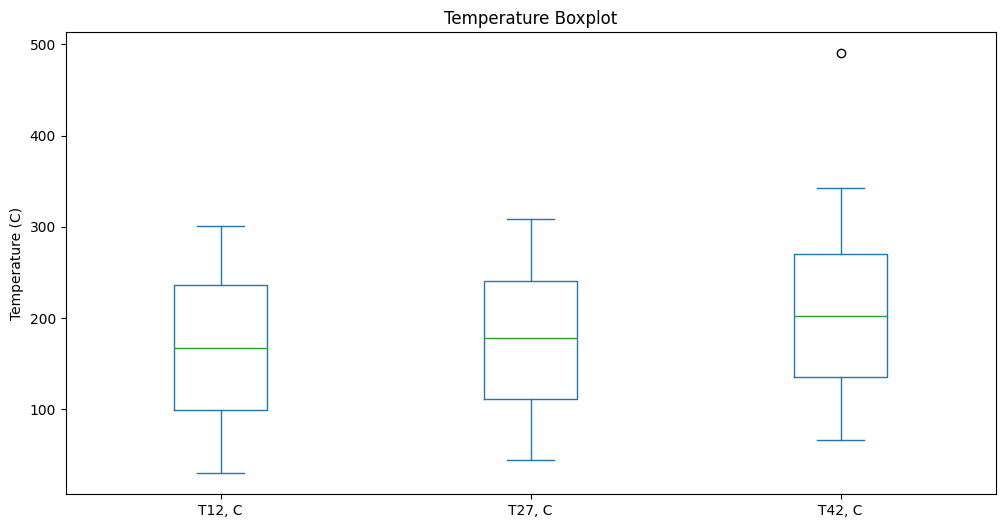

In [13]:
# box plot
df[['T12, C', 'T27, C', 'T42, C']].plot(kind='box', figsize=(12, 6), title='Temperature Boxplot', ylabel='Temperature (C)')
plt.show()

Remove outliers

In [14]:
# remove outliers for all columns
for col in df.columns:
    iqr = df_desc.loc['75%', col] - df_desc.loc['25%', col]
    upper_bound = df_desc.loc['75%', col] + 1.5 * iqr
    lower_bound = df_desc.loc['25%', col] - 1.5 * iqr
    df = df[(df[col] < upper_bound) & (df[col] > lower_bound)]

Remove impractical entries

In [15]:
# find entries with T12 > T27 or T27 > T42
df[(df['T12, C'] > df['T27, C']) | (df['T27, C'] > df['T42, C'])]

,"T12, C","T27, C","T42, C",XB
275,190.34,179.96,203.73,0.033070
401,234.03,239.55,220.50,0.064195


In [16]:
# remove the found entries
df = df[(df['T12, C'] < df['T27, C']) & (df['T27, C'] < df['T42, C'])]
df.describe()

,"T12, C","T27, C","T42, C",XB
count,536.000000,536.000000,536.000000,536.000000
mean,166.983218,176.386231,202.588797,0.038879
std,79.590442,76.134138,79.495650,0.030563
min,30.000000,45.000000,67.000000,0.001077
25%,98.862500,110.685000,134.722500,0.010918
50%,165.830000,177.660000,201.785000,0.032325
75%,236.012500,241.007500,270.320000,0.062478
max,300.880000,308.400000,343.080000,0.107951


#### Bottom Composition

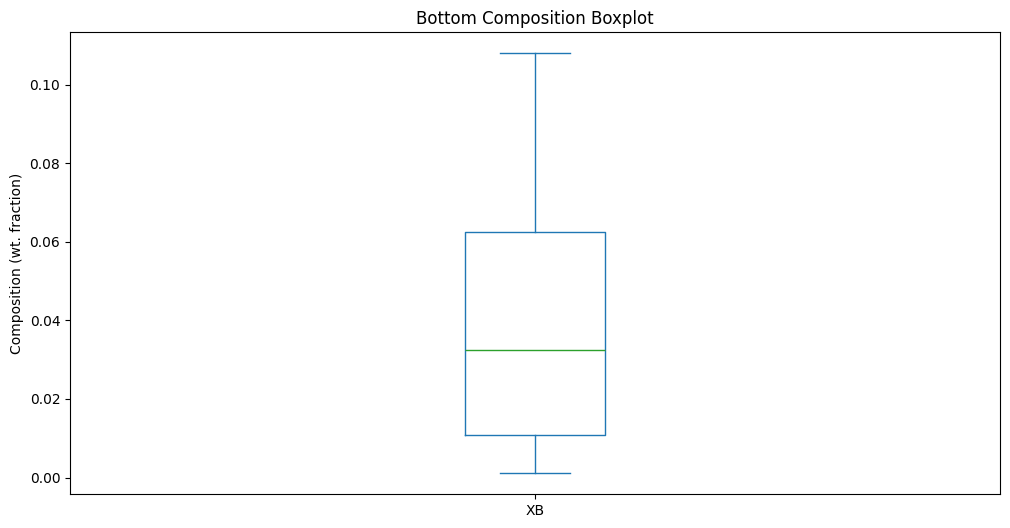

In [17]:
df['XB'].plot(kind='box', figsize=(12, 6), title='Bottom Composition Boxplot', ylabel='Composition (wt. fraction)')
plt.show()

<h3>Correlation Analysis</h3>

Calculate correlation between parameters

In [18]:
# calculate correlation matrix
corr_matrix = df.corr()
corr_matrix

,"T12, C","T27, C","T42, C",XB
"T12, C",1.000000,0.999785,0.999698,0.979061
"T27, C",0.999785,1.000000,0.999650,0.978558
"T42, C",0.999698,0.999650,1.000000,0.981893
XB,0.979061,0.978558,0.981893,1.000000


Visualize the correlation between parameters

<Axes: >

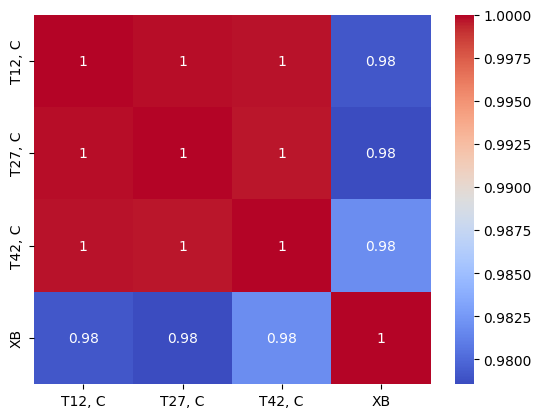

In [19]:
# plot correlation matrix as a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

Visualize the correlation trends

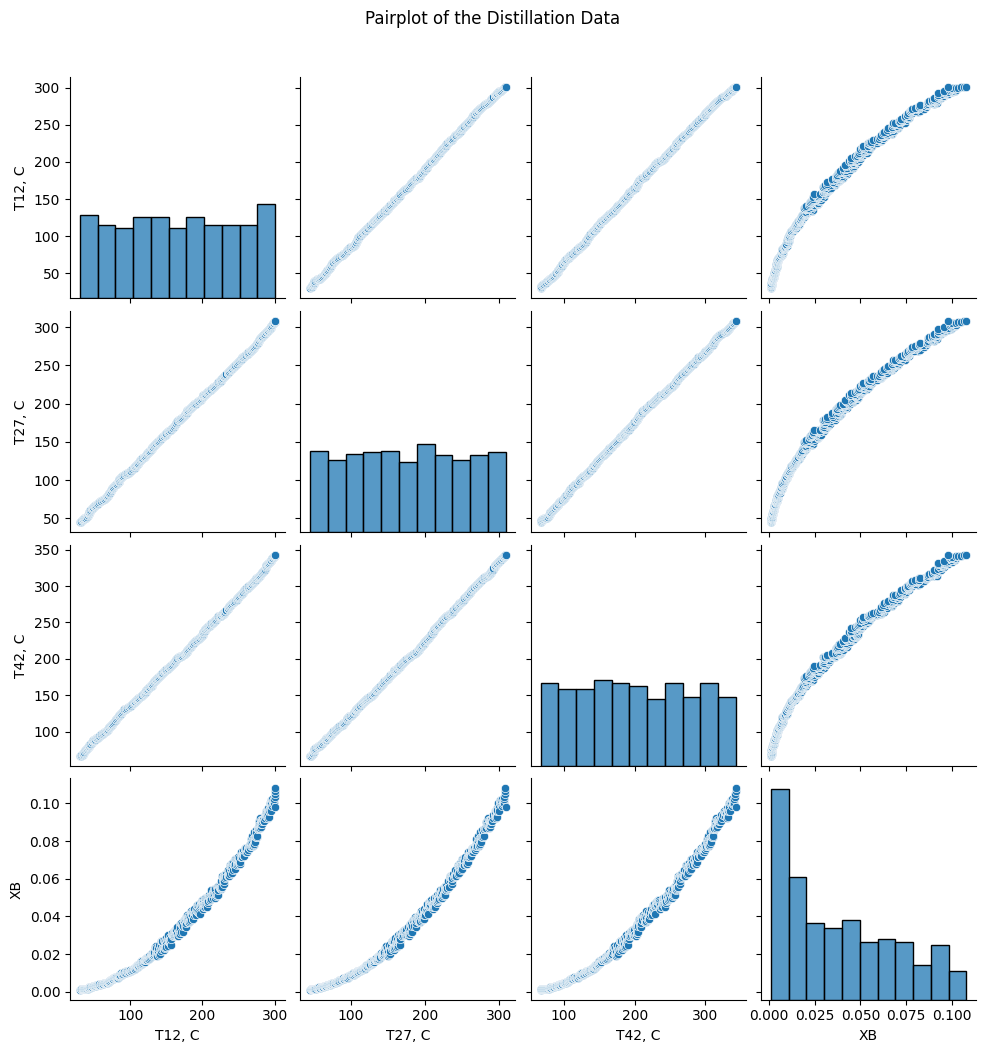

In [20]:
# plot scatter matrix (pairplot)
sns.pairplot(df, diag_kind='hist')

# add figure title
plt.suptitle('Pairplot of the Distillation Data', y=1.05)

plt.show()

<hr id="model">

<h2>5. Model Development and Evaluation</h2>

Let's first try linear regression to fit `Temperature Readings` vs `Bottom Composition`

In [21]:
# 1. import the necessary modules for the selected model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# 2. create a linear regression model instance
lr = LinearRegression()

# 3. extarct X & Y 
x = df[['T42, C']]
y = df['XB']

# 4. pre-process the data (if necessary)

# 5. split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# 6. fit the model to the training data
lr.fit(x_train, y_train)

# 7. make predictions using the testing set
y_pred = lr.predict(x_test)

# 8. evaluate the model
print('Mean squared error (MSE): {:.2f}'.format(mean_squared_error(y_test, y_pred)))
print('Coefficient of determination (R2): {:.2f}'.format(r2_score(y_test, y_pred)))

# print the coefficients
print('Coefficients: \n', lr.coef_)
print('Intercept: \n', lr.intercept_)

Mean squared error (MSE): 0.00
Coefficient of determination (R2): 0.96
Coefficients: 
 [0.00037883]
Intercept: 
 -0.0381886747141801


#### Visualize model results

**1. Predicted vs Actual Plot**

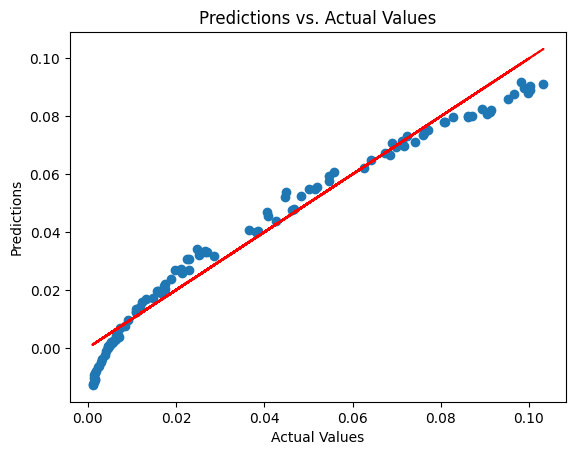

In [22]:
# plot the predictions vs. the actual values
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, '--r')
plt.xlabel('Actual Values')
plt.ylabel('Predictions')
plt.title('Predictions vs. Actual Values')
plt.show()

**2. Residuals Plot**

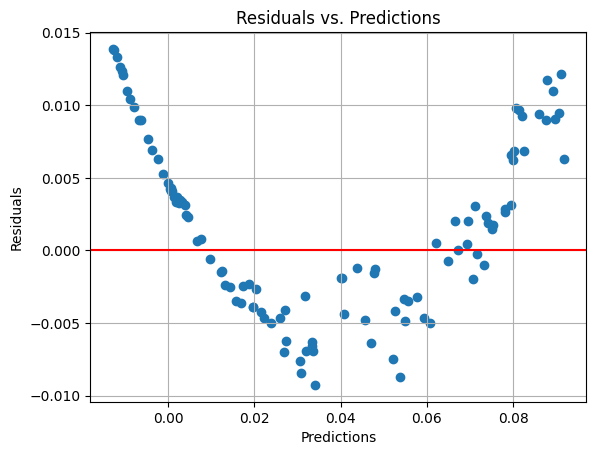

In [23]:
# plot the residuals
plt.scatter(y_pred, y_test - y_pred)
plt.xlabel('Predictions')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predictions')
plt.grid()

# plot zero error line
plt.axhline(0, color='r')

plt.show()

<p style="color:red;">*The model performs poorly around <code>X_B ~ 10^-3</code></p>

#### Let's try polynomial regression

In [24]:
# 1. import the necessary modules for the selected model
from sklearn.preprocessing import PolynomialFeatures

# 2. create a polynomial regression model
lr_poly = LinearRegression()

# 3. extarct X & Y 
x = df[['T42, C']]
y = df['XB']

# 4. pre-process the data (if necessary)
# add polynomial features to the input data (e.g. X, X^2, X1*X2, etc.)
poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(x)

# 5. split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_poly, y, test_size=0.2, random_state=42)

# 6. fit the model to the training data
lr_poly.fit(x_train, y_train)

# 7. make predictions using the testing set
y_pred = lr_poly.predict(x_test)

# 8. evaluate the model
print('Mean squared error (MSE): {:.2f}'.format(mean_squared_error(y_test, y_pred)))
print('Coefficient of determination (R2): {:.2f}'.format(r2_score(y_test, y_pred)))

# print the coefficients
print('Coefficients: \n', lr_poly.coef_)
print('Intercept: \n', lr_poly.intercept_)

Mean squared error (MSE): 0.00
Coefficient of determination (R2): 1.00
Coefficients: 
 [ 0.00000000e+00 -1.78032683e-05  9.66168016e-07]
Intercept: 
 -0.0032533123816341006


#### Visualize model results

**1. Predicted vs Actual Plot**

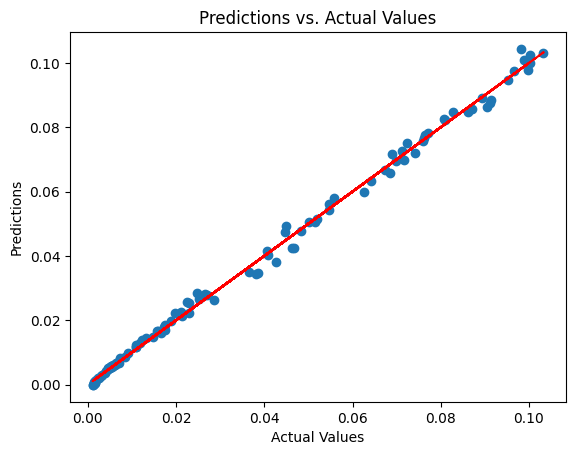

In [25]:
# plot the predictions vs. the actual values
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, '--r')
plt.xlabel('Actual Values')
plt.ylabel('Predictions')
plt.title('Predictions vs. Actual Values')
plt.show()

**2. Residuals Plot**

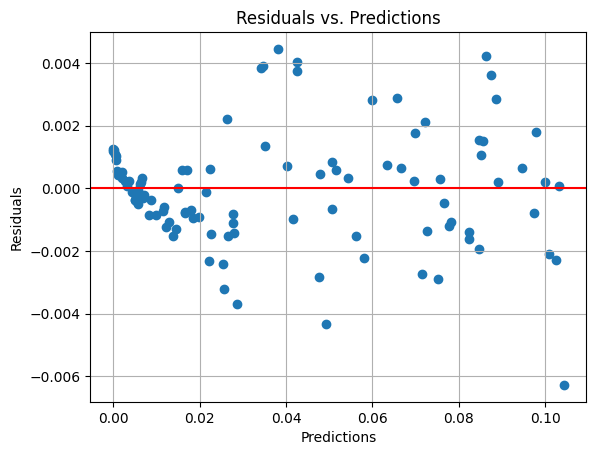

In [26]:
# plot the residuals
plt.scatter(y_pred, y_test - y_pred)
plt.xlabel('Predictions')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predictions')
plt.grid()

# plot zero error line
plt.axhline(0, color='r')

plt.show()

<p style="color:green;">*The polynomial model performs better than the linear model</p>

<hr id="2">
<h2>2. Logistic Regression</h2>


### **Overview**
* Logistic regression is a statistical algorithm used for binary classification tasks.  
* It models the relationship between a set of independent variables and the probability of a binary outcome using a logistic function.  
* The algorithm estimates coefficients for each independent variable, which represent their impact on the log-odds of the outcome.  
* The logistic function maps the log-odds to a probability value between 0 and 1.  
* By setting a threshold, predictions can be made based on whether the probability exceeds the threshold.  
* Logistic regression is widely used due to its simplicity, interpretability, and efficiency with small to medium-sized datasets.  

<div style="text-align: center; margin:2rem;">
    <img src="logistic-regression.webp">
    <br>
    <small>*source: https://medium.com/analytics-vidhya/understanding-logistic-regression-b3c672deac04</small>
</div>

<hr width="50%" style="margin-top: 2rem; margin-bottom: 2rem; margin-left:0">

### **Advantages**
* Simple and easy to interpret, making it suitable for understanding feature impact.
* Efficient with small to moderate-sized datasets, avoiding overfitting.
* Produces probabilistic outputs, providing confidence levels for predictions.
* Facilitates feature importance analysis, aiding in feature selection.
* Handles some degree of nonlinearity through feature transformations.
* Well-studied and established with solid theoretical foundations.
* Versatile, can handle multiclass classification and incorporate regularization techniques.

<hr width="50%" style="margin-top: 2rem; margin-bottom: 2rem; margin-left:0">

### **Disadvantages**
* Assumes linear relationship between features and log odds.
* Limited to binary or multinomial classification tasks.
* Sensitive to outliers and multicollinearity.
* May not perform well with highly non-linear data.
* Requires feature engineering for complex relationships.
* Prone to underfitting if the model is too simple.
* Cannot handle missing values easily, requiring data preprocessing.

<hr width="50%" style="margin-top: 2rem; margin-bottom: 2rem; margin-left:0">

### **Selection Guidelines**
- The outcome variable is binary or categorical with two levels.
- Interpretability of coefficients and probabilistic predictions are important.
- There is a need for a simple and computationally efficient model.


<hr width="50%" style="margin-top: 2rem; margin-bottom: 2rem; margin-left:0">

### **Applications**
- Fault Detection and Diagnosis: 
  - Classify process states as normal or abnormal for fault detection.
- Quality Prediction and Control: 
  - Model process variables vs. quality specifications for prediction and control.
- Safety Analysis: 
  - Assess safety incident probability based on process variables.

<hr width="50%" style="margin-top: 2rem; margin-bottom: 2rem; margin-left:0">

### **Example**

**Problem Overview:**

In the Oil & Gas (O&G) industry, hydraulic fracturing (frac) treatments are crucial for stimulating well production. However, some stages within a frac can be unexpectedly challenging to treat, requiring additional chemicals and potentially leading to operational difficulties.

**Objectives:**

This project aims to develop a machine learning model that can predict whether a hydraulic frac stage will be challenging to treat (class 1) or not (class 0) based on readily available wellbore data.

**Data:**

The dataset consists of historical frac stage data with the following features for each stage:

* Measured Depth (ft): Depth of the stage within the wellbore.
* Resistivity (ohm-m): Electrical resistance of the rock formation.
* Young's Modulus / Poisson's Ratio (YM/PR, 10^6 psi): Ratio of rock's stiffness to its tendency to deform under stress.
* Gamma Ray (gAPI): Natural radioactivity of the rock formation.
* Minimum Horizontal Stress (psi): Minimum stress acting on the rock formation in the horizontal direction.

The target variable is a binary classification:

* Class 0: Stage was not challenging to frac.
* Class 1: Stage was challenging to frac, requiring additional treatment.

By analyzing this data and building a classification model, O&G companies can potentially:

* Identify challenging stages beforehand: Flag problematic stages before the frac job, allowing for better planning and resource allocation.
* Optimize treatment strategies: Proactively adjust frac fluid composition and pumping procedures for challenging stages, potentially reducing treatment time and costs.
* Improve operational efficiency: Minimize surprises during the frac job, leading to smoother operations and potentially higher well productivity.
* This approach can lead to significant cost savings, improved operational efficiency, and ultimately, increased well performance in the O&G industry.


Read the data from `Fracability_DataSet.csv` into a `Pandas DataFrame`

In [27]:
# load the data
data = pd.read_csv('Fracability_DataSet.csv')

Build, train, and evaluate a logistic regression model.

In [28]:

# 1. import the necessary modules for the selected model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# 2. create the model
logreg = LogisticRegression()

# 3. extract X & Y
x = data.drop('Fracability', axis=1)
y = data['Fracability']

# 4. pre-process the data (if necessary)

# 5. split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# 6. fit the model
logreg.fit(x_train, y_train)

# 7. make predictions
y_pred_train = logreg.predict(x_train)
y_pred_test = logreg.predict(x_test)

# 8. evaluvate the model
print('Training Data Classification Report:')
print(classification_report(y_train, y_pred_train))
print('Testing Data Classification Report:')
print(classification_report(y_test, y_pred_test))

Training Data Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.85      0.88       402
           1       0.86      0.90      0.88       398

    accuracy                           0.88       800
   macro avg       0.88      0.88      0.88       800
weighted avg       0.88      0.88      0.88       800

Testing Data Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.93      0.91        98
           1       0.93      0.88      0.90       102

    accuracy                           0.91       200
   macro avg       0.91      0.91      0.90       200
weighted avg       0.91      0.91      0.90       200



<hr id="3">
<h2>3. K-Nearest Neighbors (KNN)</h2>


### **Overview**
- Instance-based learning algorithm that stores training examples and classifies new instances based on their similarity to existing data points.
- Can be used for both **classification** and **regression**
- **Classification**: Classifies data points by finding the K nearest neighbors (data points with similar features) based on the class majority vote.
- **Regression**: Predicts a numerical value for data points by finding the K nearest neighbors (data points with similar features) based on the avarage value.
- Non-parametric as it doesn't make assumptions about the underlying data distribution.
- The choice of K (number of neighbors) is a hyperparameter that affects the model's performance and bias-variance trade-off.


<div style="text-align: center; margin:2rem;">
    <img src="KNN.jpg">
    <br>
    <small>*source: Ankur Kumar, Jesus Flores-Cerrillo, 2022. Machine Learning in Python for Process Systems Engineering</small>
</div>

<hr width="50%" style="margin-top: 2rem; margin-bottom: 2rem; margin-left:0">

### **Advantages**
- Simple and easy to understand and implement.
- No training phase, making it lazy learning.
- Automatically adapts as new data is collected.
- Suitable for both classification and regression tasks.
- Can handle multi-class classification and non-linear decision boundaries.

<hr width="50%" style="margin-top: 2rem; margin-bottom: 2rem; margin-left:0">

### **Disadvantages**
- KNN requires a lot of memory as it stores all training data points.
- Noise and outliers can significantly affect the classification result.
- Features with different scales can bias distance calculations.
- Performance can degrade with a large number of features (curse of dimensionality).
- Prediction time can be slow, especially with large datasets or high values of K.
- Selection of the optimal number of neighbors (K) can impact model performance and requires tuning.

<hr width="50%" style="margin-top: 2rem; margin-bottom: 2rem; margin-left:0">

### **Selection Guidelines**
- There is no clear underlying data distribution 
- The data has complex relationships, and interpretability is not a primary concern
- Small to medium-sized datasets. It is not suitable for large datasets or datasets with high dimensionality due to its computational complexity.


<hr width="50%" style="margin-top: 2rem; margin-bottom: 2rem; margin-left:0">

### **Applications**
- Chemical Process Monitoring:
  - Classifies process states using sensor measurements for real-time monitoring and anomaly detection.

- Product Quality Prediction:
  - Predicts chemical product quality from process variables for quality control and optimization.

- Environmental Monitoring:
  - Analyzes air quality data to identify pollution sources and assess environmental impact.

- Material Design and Selection:
  - Assists in predicting material properties for material design and selection based on composition and structure.

- Sensor Selection:
  - Helps select informative sensors for monitoring and control based on their relationships with variables.

- Property Estimation:
  - Estimates chemical compound properties from structural features, aiding in new molecule and material design.

<hr width="50%" style="margin-top: 2rem; margin-bottom: 2rem; margin-left:0">

### **Example**
*Source: https://github.com/ML-PSE/Machine_Learning_for_PSE*

**Problem Overview:**
- FD-kNN (Fault Detection by k-Nearest Neighbors) is based on the concept of comparing distances between faulty and normal samples.
- It defines a monitoring metric called kNN squared distance for each training sample.
- The metric calculates the distance of each sample from its nearest neighbors and sums them up.
- A threshold is then computed based on the desired confidence level.
- A test sample is labeled as faulty if its kNN squared distance exceeds the threshold.
- FD-kNN is advantageous for complex process systems with characteristics like multimodality, non-gaussianity, and non-linearity.
- The method will be illustrated using the metal-etch dataset with pre-processing steps like unfolding, scaling, and PCA using Sklearn's Pipeline feature.
- The value of k (number of neighbors) is set to 5, and the monitoring metric threshold is computed using Kernel Density Estimation (KDE).

**Objectives:**
- Utilize FD-kNN (Fault Detection by k-Nearest Neighbors) for fault detection in semiconductor manufacturing.
- Develop a monitoring metric (kNN squared distance) to detect faults based on distance comparisons.

**Data:**
- The dataset is from a semiconductor manufacturing process involving an etching process.
- The dataset includes engineering variables from a LAM 9600 Metal Etcher.
- It covers the etching process of 129 wafers, with 108 normal wafers, and 21 intentionally faulty wafers from the same experiments.
- Batch durations vary between 95 to 112 seconds.
- It includes data from multiple batches consisting of 19 process variables (in addition to time and step number):
  - Time          
  - Step Number
  1. BCl3 Flow     
  2. Cl2 Flow      
  3. RF Btm Pwr    
  4. RF Btm Rfl Pwr
  5. Endpt A       
  6. He Press      
  7. Pressure      
  8. RF Tuner      
  9. RF Load       
  10. RF Phase Err  
  11. RF Pwr        
  12. RF Impedance  
  13. TCP Tuner     
  14. TCP Phase Err 
  15. TCP Impedance 
  16. TCP Top Pwr   
  17. TCP Rfl Pwr   
  18. TCP Load      
  19. Vat Valve     

Read the normal conditions data into a `Pandas DataFrame`

In [29]:
# load normal data
data = np.loadtxt('metal_etch_train.csv', delimiter=',')

In [30]:
# 1. import the necessary modules for the selected model
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

# 2. create the model
nbrs = NearestNeighbors(n_neighbors=6)

# 3. extract X & Y (skip as there are no labels "y" here)
# a data-point is its own neighbor in the training dataset

# 4. pre-process the data (if necessary)
# scale data & fit PCA model via pipeline
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components = 3))
])
score_train = pipe.fit_transform(data)

# 5. split the data into training and testing sets (skip)

# 6. fit the model
# k-nearest neighbors of each training sample in score space
nbrs.fit(score_train)

# 7. make predictions
# find the k-neighbors of each point in the training dataset
d2_nbrs, indices = nbrs.kneighbors(score_train)
d2_sqrd_nbrs = d2_nbrs**2
D2 = np.sum(d2_sqrd_nbrs, axis = 1)
D2_log = np.log(D2)

Create a helper function to compute the **control limit (CL)** for a given dataset and a required percentile

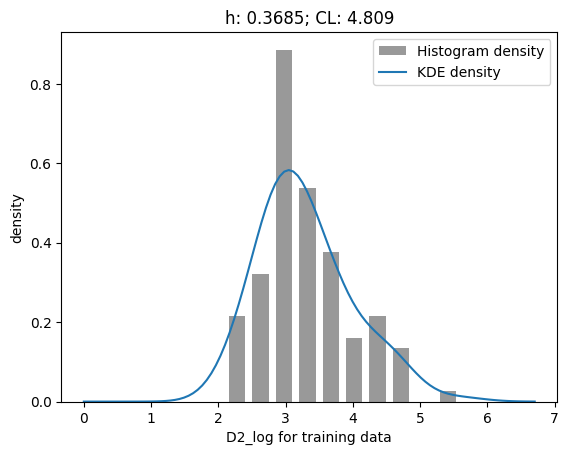

In [31]:
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV

# calculates control limit for a monitoring statistic via KDE.
def get_CL_via_KDE(metric_values, percentile, metricLabel):
    """
    Source: https://github.com/ML-PSE/Machine_Learning_for_PSE/blob/master/Chapter_OtherUsefulMethods/FD-kNN.ipynb

    Calculate control limit for a monitoring statistic via KDE.

    Parameters:
    metric_values: numpy array of shape = [n_samples,]
    percentile: int, the desired percentile for the control limit
    metricLabel: str, label for the metric for chart titles

    Returns:
    metric_CL: float, control limit value
    """

    # Find optimal KDE bandwidth via CV
    N = len(metric_values)
    empirical_h = 1.06 * np.std(metric_values) * N ** (1/5)
    h_grid = np.linspace(0.001, 5, 50) * empirical_h 

    grid = GridSearchCV(KernelDensity(), {'bandwidth': h_grid}, cv=N) # leave-one-out CV
    grid.fit(metric_values[:, None]) # 2D array is expected
    optimal_h = grid.best_params_['bandwidth']

    # Compute pdf values via KDE 
    kde = grid.best_estimator_  
    metric_grid = np.linspace(0, 1.2 * np.max(metric_values), 100)[:, None]
    metric_pdf_values = np.exp(kde.score_samples(metric_grid))

    # Find control limit via numerical integration
    metric_cdf_values = [np.trapz(metric_pdf_values[:i, None], metric_grid[:i, :], axis=0)[0] for i in range(100)]
    metric_CL = metric_grid[np.argmax(np.array(metric_cdf_values) > percentile/100), 0]

    # KDE plot with histogram
    plt.figure()
    plt.hist(metric_values, bins=10, color='grey', histtype='bar', alpha=0.8, density=True, rwidth=0.7, label='Histogram density')
    plt.plot(metric_grid, metric_pdf_values, alpha=1, label='KDE density')
    plt.title('h: {:.4f}; CL: {:.3f}'.format(optimal_h, metric_CL))
    plt.ylabel('density')
    plt.xlabel(metricLabel)
    plt.legend()

    return metric_CL

# calculate control limit for D2_log
D2_log_CL = get_CL_via_KDE(D2_log, 95, 'D2_log for training data')

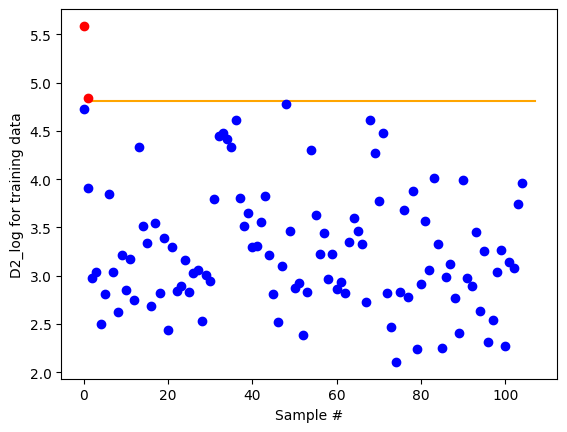

In [32]:
# visualize the D2_log values and the control limit
plt.figure()
plt.plot([1,len(D2_log)],[D2_log_CL, D2_log_CL], color='orange')

# plot values below the control limit in blue
plt.plot(D2_log[D2_log < D2_log_CL], marker='o', linestyle='', color='blue')

# plot values above the control limit in red
plt.plot(D2_log[D2_log >= D2_log_CL], marker='o', linestyle='', color='red')

plt.xlabel('Sample #')
plt.ylabel('D2_log for training data')
plt.show()

The figure indicates only 2 data points are mislabeled in the training set.

**Model evaluation**  

Read the faulty data into a `Pandas DataFrame` and evaulate the model performance in identifying them as faulty.

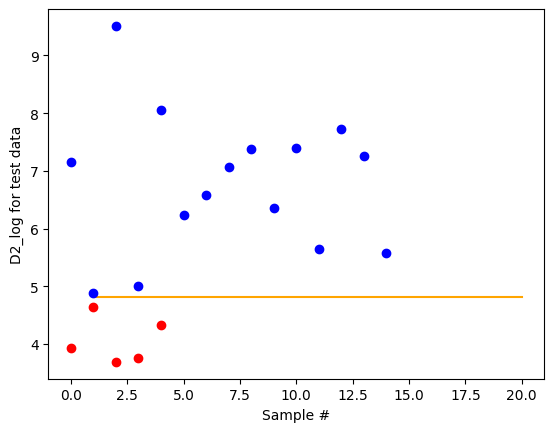

In [33]:
# load faulty data
data_test = np.loadtxt('metal_etch_test.csv', delimiter=',')

# pre-process the data (if necessary)
# scale and PCA on faulty test data
score_test = pipe.transform(data_test)

# make predictions
# find the k-neighbors of each point in the training dataset
d2_nbrs_test, indices = nbrs.kneighbors(score_test)
d2_nbrs_test = d2_nbrs_test[:,0:5] # we want only 5 nearest neighbors
d2_sqrd_nbrs_test = d2_nbrs_test**2
D2_test = np.sum(d2_sqrd_nbrs_test, axis = 1)
D2_log_test = np.log(D2_test)

# evaluate the model
# plot the D2_log values and the control limit for the test data
plt.figure()
plt.plot([1,len(D2_log_test)],[D2_log_CL, D2_log_CL], color='orange')

# plot values below above control limit in blue
plt.plot(D2_log_test[D2_log_test >= D2_log_CL], marker='o', linestyle='', color='blue')

# plot values below control limit in red
plt.plot(D2_log_test[D2_log_test < D2_log_CL], marker='o', linestyle='', color='red')

plt.xlabel('Sample #')
plt.ylabel('D2_log for test data')
plt.show()

The figure demonstrates an impressive result! Despite the training data lacking information about faulty test samples, only 5 samples were misclassified.

<hr style="margin-top: 4rem;">
<h2>Author</h2>

<a href="https://github.com/SamerHany">Samer Hany</a>

<h2>References</h2>

- Hoss Belyadi, Alireza Haghighat, 2021. Machine Learning Guide for Oil and Gas Using Python
- Ankur Kumar, Jesus Flores-Cerrillo, 2022. Machine Learning in Python for Process Systems Engineering
- https://github.com/ML-PSE/Machine_Learning_for_PSE